In [2]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(r"G:\临时3-8\网易云课堂《菜菜的机器学习sklearn课堂》\课件\04主成分分析PCA与奇异值分解SVD\digit recognizor.csv",
                  engine = 'python'
                  )
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x = data.iloc[:,1:]
y = data.iloc[:,0]
x.shape

(42000, 784)

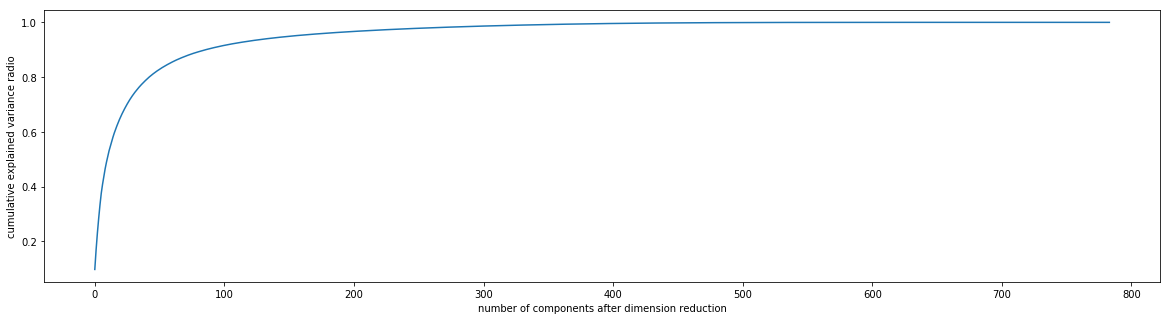

In [8]:
# 画累计方差贡献率曲线，找到最佳降维后维度的范围
pca_line = PCA().fit(x)
plt.figure(figsize = [20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance radio")
plt.show()

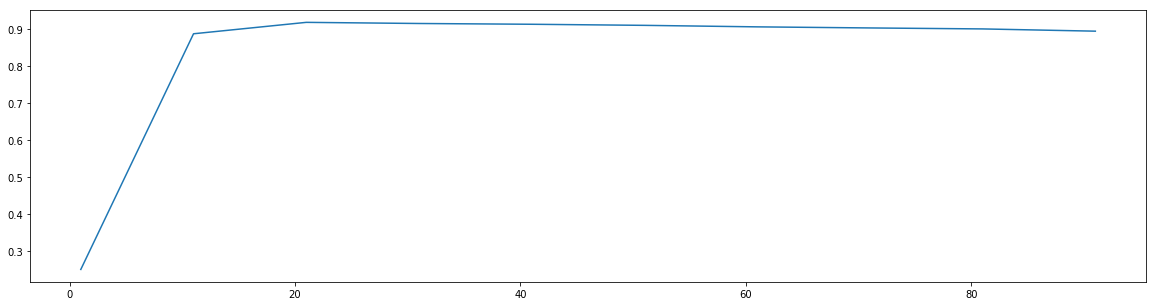

In [9]:
# 降维后维度的学习曲线，继续缩小最佳维度的范围
score = []
for i in range(1,101,10):
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators = 10,random_state =0),
                          x_dr,y,cv =5).mean()
    score.append(once)
plt.figure(figsize = [20,5])
plt.plot(range(1,101,10),score)
plt.show()

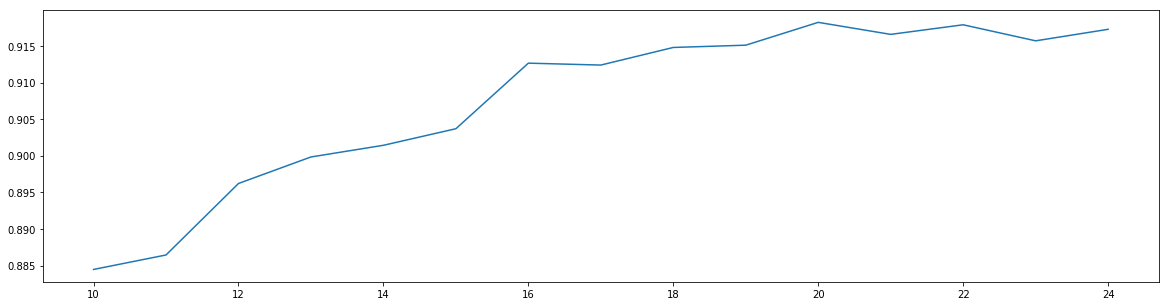

In [10]:
# 强化学习曲线，找出降维后的最佳维度
score = []
for i in range(10,25):
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators =10,random_state =0),
                          x_dr,y,cv =5).mean()
    score.append(once)
plt.figure(figsize = [20,5])
plt.plot(range(10,25),score)
plt.show()

In [11]:
# 导入找出最佳维度进行降维，查看模型效果
x_dr = PCA(23).fit_transform(x)
cross_val_score(RFC(n_estimators = 100,random_state = 0),x_dr,y,cv =5).mean()

0.9463813288331504

## KNN的K值学习曲线

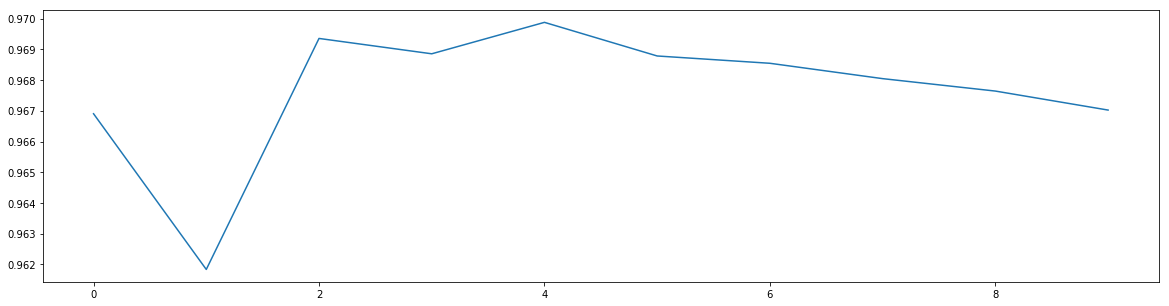

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN
score = []
for i in range(10):
    x_dr = PCA(23).fit_transform(x)
    once = cross_val_score(KNN(i+1),x_dr,y,cv =5).mean()
    score.append(once)
    
plt.figure(figsize =[20,5])
plt.plot(range(10),score)
plt.show()

In [15]:
%%timeit
cross_val_score(KNN(4),x_dr,y,cv =5).mean()

25.6 s ± 692 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
